In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
yearlyDf <- read.csv('../data/processed/yearly-supply-demand.csv', stringsAsFactors=FALSE)
head(yearlyDf)

Year,SoybeanPlanted,SoybeanHarvested,SoybeanValue,SoybeanBeginStocks,SoybeanProduction,SoybeanImports,SoybeanTotalQuanity,SoybeanCrush,SoybeanExports,⋯,SunflowerSeedOilPrice,CanolaSeedOilPrice,PeanutOilPrice,CornOilPrice,LardPrice,EdibleTallowPrice,CottonseedMealPrice,SunflowerseedMealPrice,CanolaMealPrice,LinseedMealPrice
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1960,24440000,23655000,1184910000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961,27787000,27003000,1543909000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1962,28418000,27608000,1564352000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1963,29462000,28615000,1755076000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1964,31721000,30793000,1836441000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1965,35227000,34449000,2151305000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
quarterlyDf <- read.csv('../data/processed/quarterly-supply-demand.csv', stringsAsFactors=FALSE)
head(quarterlyDf)

Year,Month,OffFarmSoybeanStocks,OnFarmSoybeanStocks,ProducedSoybeanStocks,SoybeanBeginStocks,SoybeanProduction,SoybeanImports,SoybeanTotalQuanity,SoybeanCrush,SoybeanExports,SoybeanSeedsFeedResidual,SoybeanTotalUsed,SoybeanEndStocks
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1999,12,1032666000,1.150e+09,2182666000,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000,3,665986000,7.300e+08,1395986000,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000,6,404425000,3.700e+08,774425000,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000,9,177662000,1.125e+08,290162000,290162000,2757810000,901033.7,3048873034,421136667,315767605,71977762,808882034,2239991000
2000,12,1022991000,1.217e+09,2239991000,2239991000,0,800019.5,2240791020,417936667,336291092,82655260,836883020,1403908000
2001,3,623908000,7.800e+08,1403908000,1403908000,0,813366.7,1404721367,405486667,227730251,63324449,696541367,708180000


In [4]:
monthlyDf <- read.csv('../data/processed/monthly-supply-demand.csv', stringsAsFactors=FALSE) %>% 
    mutate(
        MonthDate = as.Date(paste0(Year, '-', Month, '-01'))
    )
head(monthlyDf)

Year,Month,SoybeanImports,SoybeanCrush,SoybeanExports,SoybeanMealBeginStocks,SoybeanMealProduction,SoybeanMealImports,SoybeanMealTotalQuanity,SoybeanMealDomesticUsed,⋯,PeanutOilPrice,CornOilPrice,LardPrice,EdibleTallowPrice,SoybeanMealPrice,CottonseedMealPrice,SunflowerseedMealPrice,CanolaMealPrice,LinseedMealPrice,MonthDate
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2006,9,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2006-09-01
2006,10,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2006-10-01
2006,11,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2006-11-01
2006,12,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2006-12-01
2007,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2007-01-01
2007,2,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2007-02-01


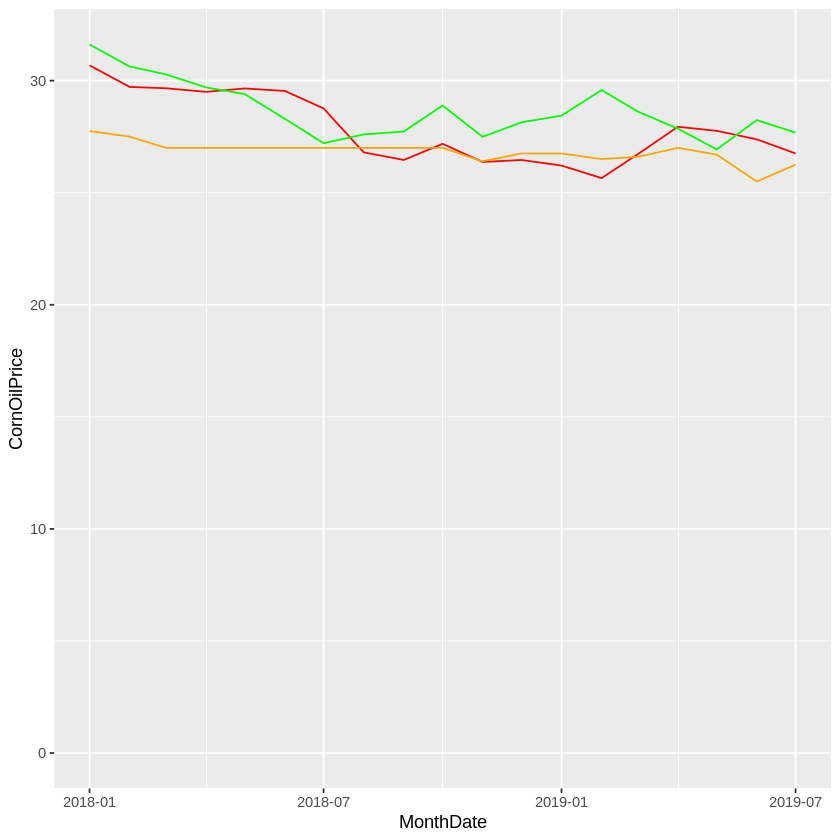

In [5]:
monthlyDf %>% 
    filter(MonthDate >= '2018-01-01') %>% 
ggplot() +
    geom_line(aes(MonthDate, CornOilPrice), color='red') +
    geom_line(aes(MonthDate, SoybeanOilPrice), color='green') +
    geom_line(aes(MonthDate, SunflowerSeedOilPrice/2), color='orange') +
    expand_limits(y=0)

In [19]:
str(yearlyDf)

'data.frame':	60 obs. of  64 variables:
 $ Year                          : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ SoybeanPlanted                : int  24440000 27787000 28418000 29462000 31721000 35227000 37294000 40819000 42265000 42534000 ...
 $ SoybeanHarvested              : int  23655000 27003000 27608000 28615000 30793000 34449000 36546000 39805000 41391000 41337000 ...
 $ SoybeanValue                  : num  1.18e+09 1.54e+09 1.56e+09 1.76e+09 1.84e+09 ...
 $ SoybeanBeginStocks            : num  NA NA NA NA NA NA NA NA NA NA ...
 $ SoybeanProduction             : num  NA NA NA NA NA NA NA NA NA NA ...
 $ SoybeanImports                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ SoybeanTotalQuanity           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ SoybeanCrush                  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ SoybeanExports                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ SoybeanSeedsFeedResidual      : num  NA NA NA NA NA NA NA NA N

Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

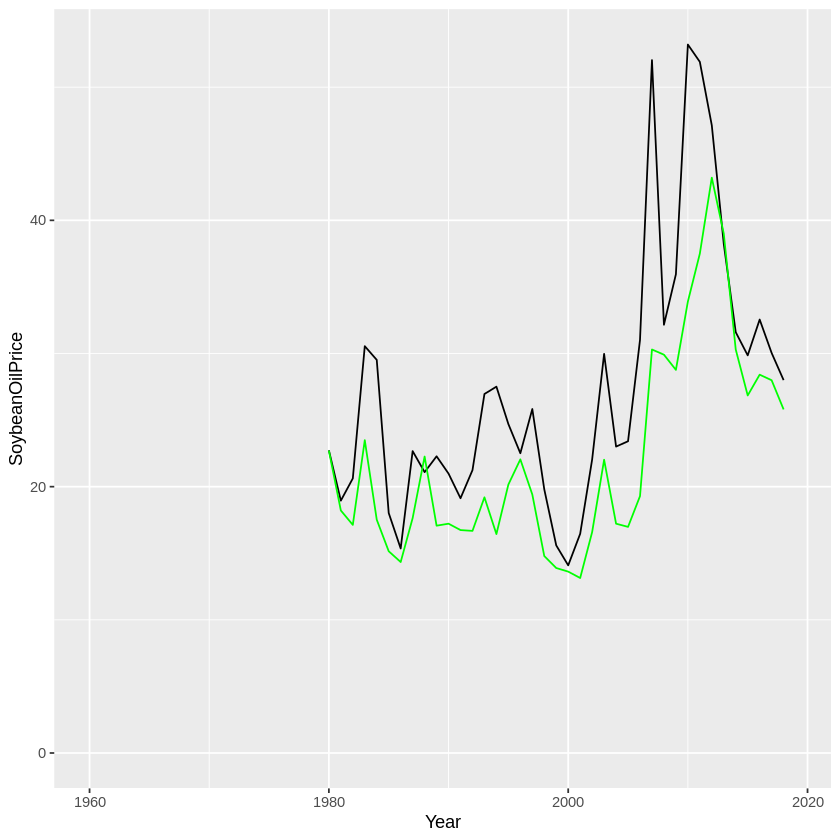

In [23]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanOilPrice)) +
    geom_line(aes(Year, SoybeanPrice * 3), color='green') +
    expand_limits(y=0)

Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

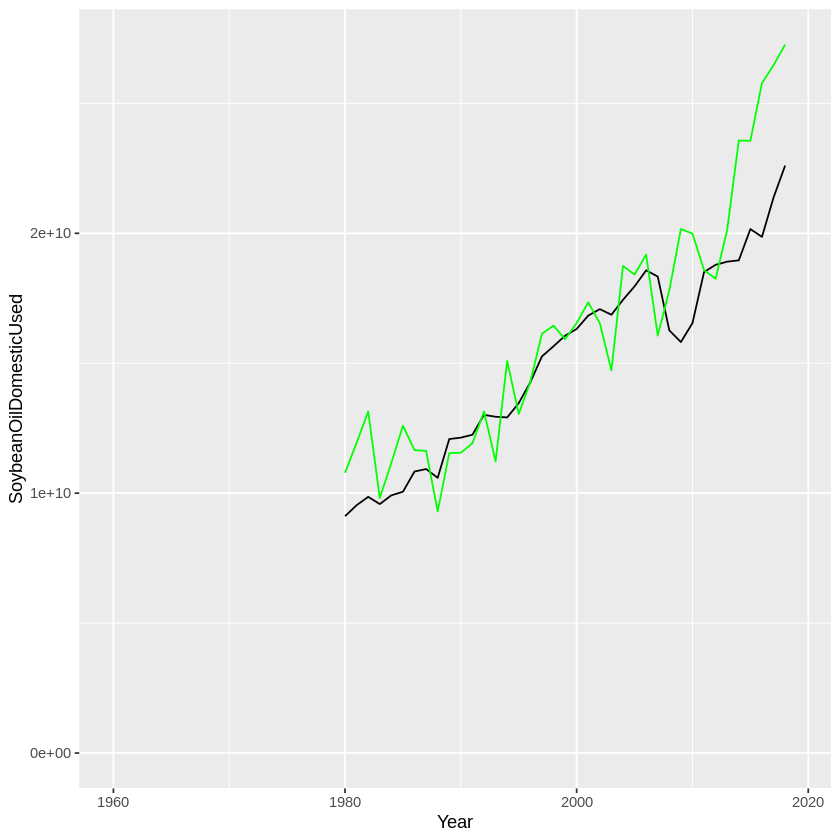

In [50]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanOilDomesticUsed)) +
    geom_line(aes(Year, SoybeanProduction*6), color='green') +
    expand_limits(y=0)

Warning message:
“Removed 22 rows containing missing values (geom_point).”

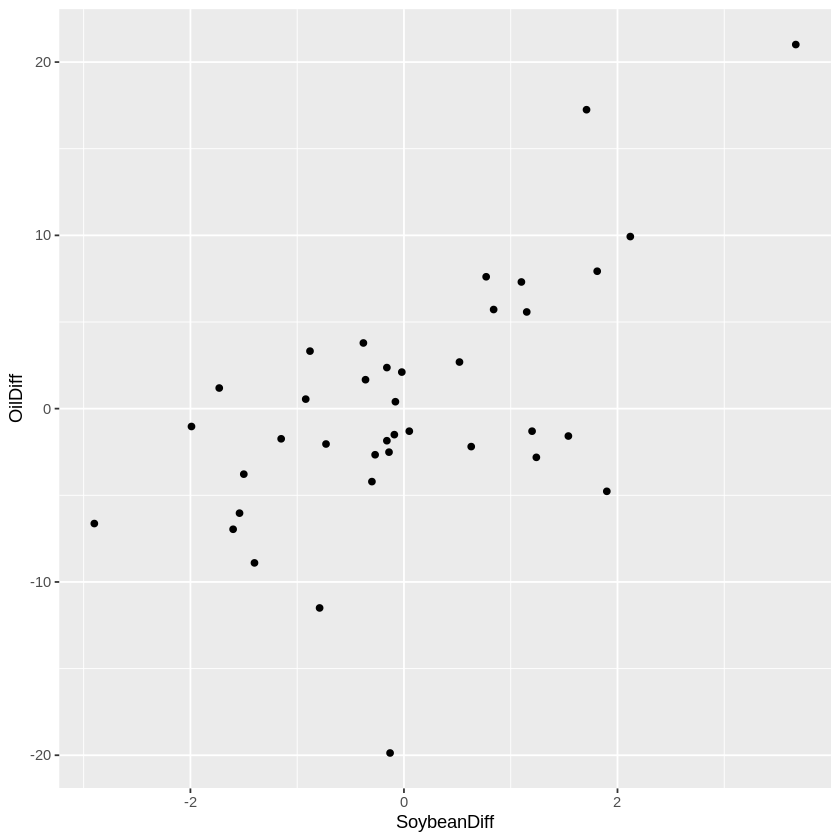

In [32]:
diffDf <- yearlyDf %>% 
    mutate(
        SoybeanDiff = SoybeanPrice - lag(SoybeanPrice),
        OilDiff = SoybeanOilPrice - lag(SoybeanOilPrice),
        MealDiff = SoybeanMealPrice - lag(SoybeanMealPrice)
    )
ggplot(diffDf) +
    geom_point(aes(SoybeanDiff, OilDiff))

In [33]:
summary(lm(OilDiff~SoybeanDiff, data=diffDf))


Call:
lm(formula = OilDiff ~ SoybeanDiff, data = diffDf)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.490  -2.028   1.022   2.897  11.559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04927    0.94905   0.052    0.959    
SoybeanDiff  3.29895    0.71597   4.608 4.95e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.849 on 36 degrees of freedom
  (22 observations deleted due to missingness)
Multiple R-squared:  0.371,	Adjusted R-squared:  0.3535 
F-statistic: 21.23 on 1 and 36 DF,  p-value: 4.95e-05


Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

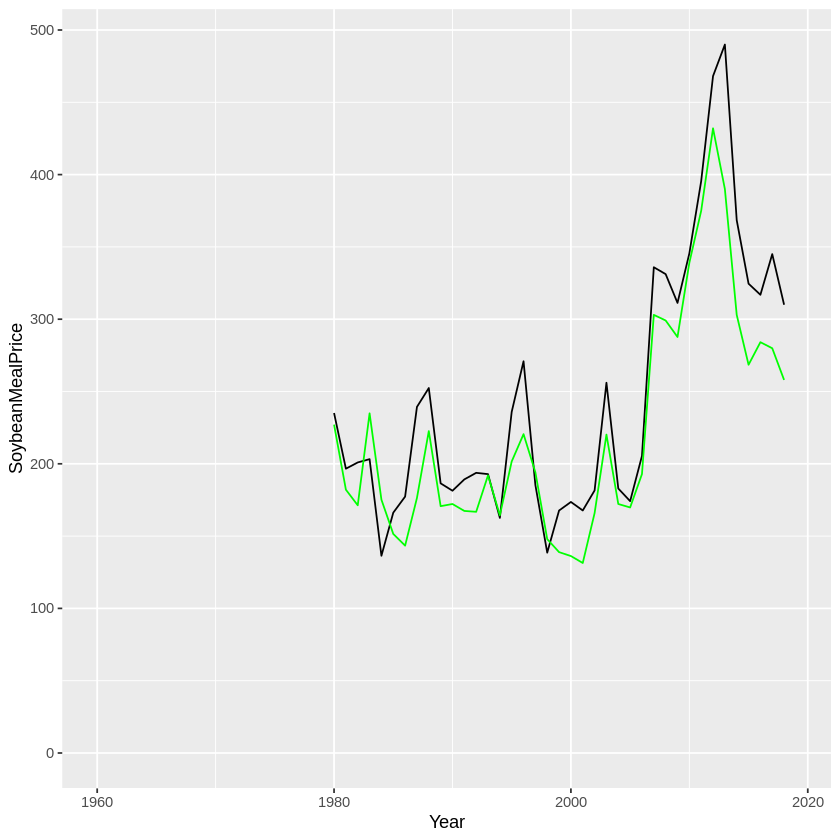

In [34]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanMealPrice)) +
    geom_line(aes(Year, SoybeanPrice * 30), color='green') +
    expand_limits(y=0)

In [35]:
summary(lm(MealDiff~SoybeanDiff, data=diffDf))


Call:
lm(formula = MealDiff ~ SoybeanDiff, data = diffDf)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.649 -13.462  -0.976  14.352  64.147 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.129      4.423   0.255      0.8    
SoybeanDiff   31.033      3.337   9.301 4.15e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.26 on 36 degrees of freedom
  (22 observations deleted due to missingness)
Multiple R-squared:  0.7061,	Adjusted R-squared:  0.698 
F-statistic: 86.51 on 1 and 36 DF,  p-value: 4.15e-11


Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

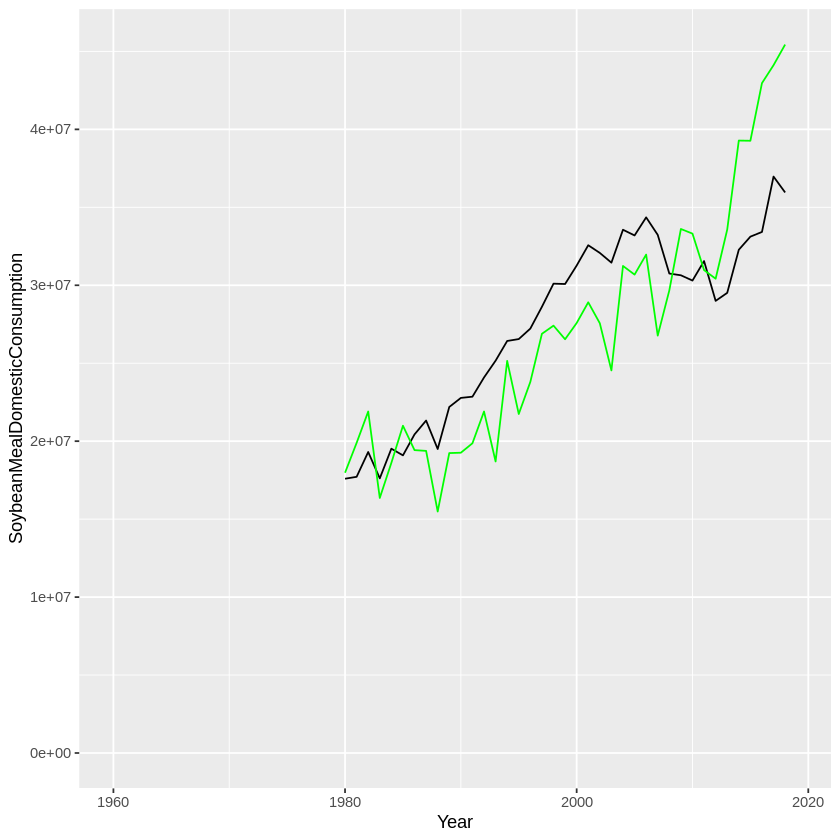

In [51]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanMealDomesticConsumption)) +
    geom_line(aes(Year, SoybeanProduction/100), color='green') +
    expand_limits(y=0)

Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

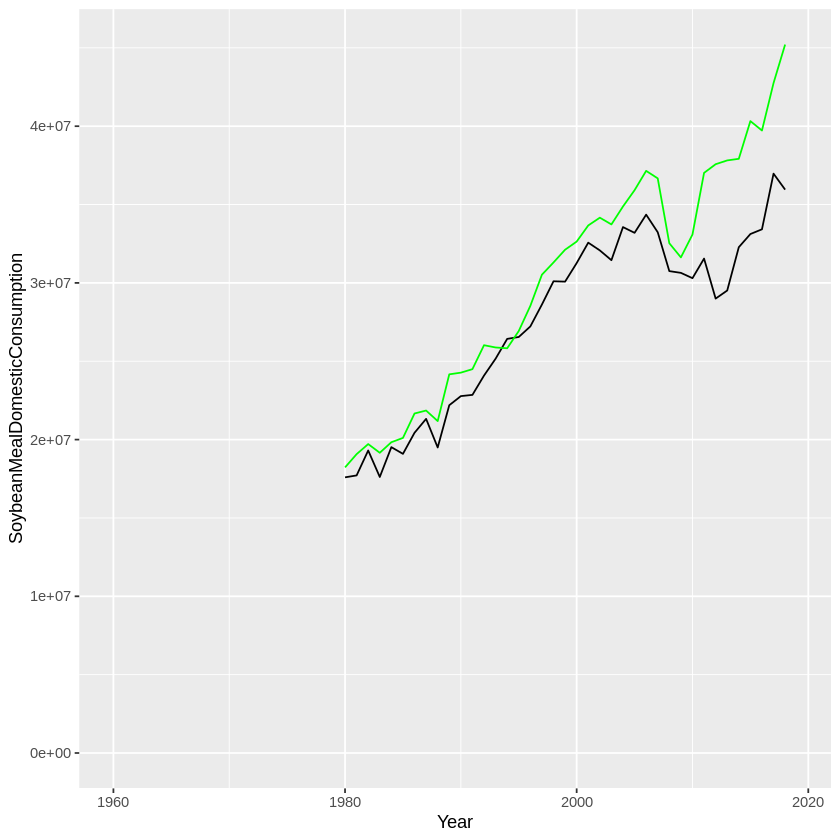

In [57]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanMealDomesticConsumption)) +
    geom_line(aes(Year, SoybeanOilDomesticUsed/500), color='green') +
    expand_limits(y=0)

Warning message:
“Removed 21 rows containing missing values (geom_path).”

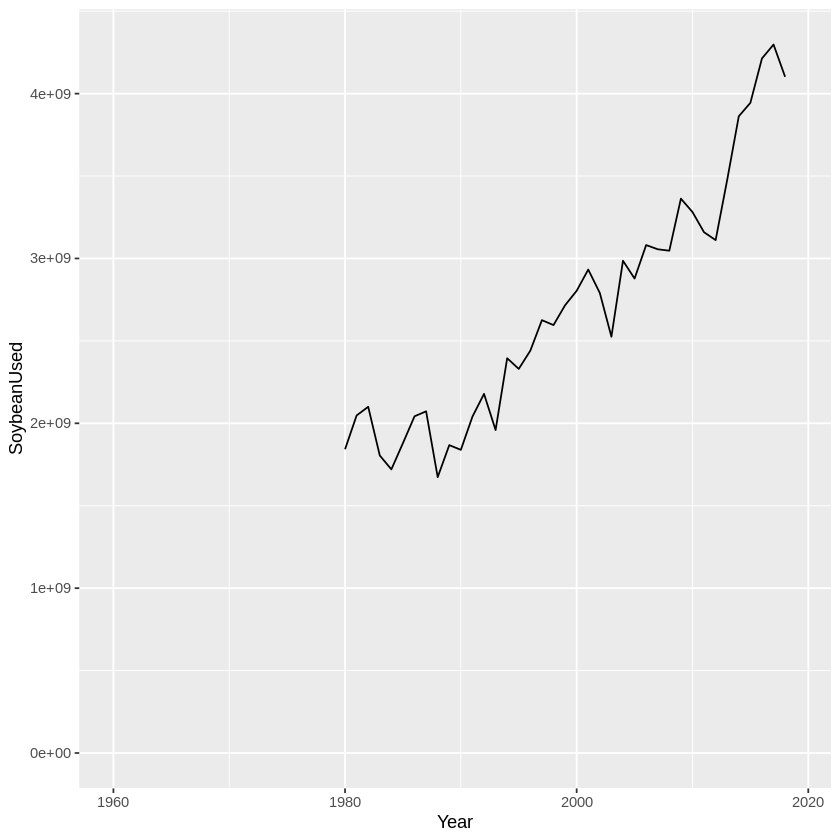

In [60]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanUsed)) +
    expand_limits(y=0)

Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

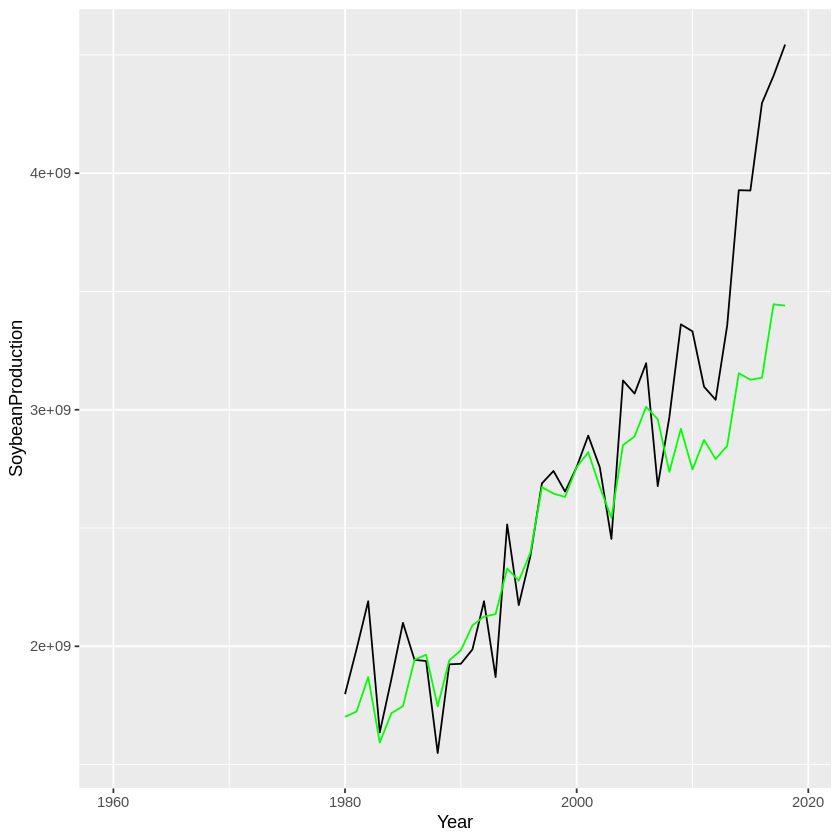

In [66]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanProduction)) +
    geom_line(aes(Year, SoybeanMealProduction*70), color='green')

Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

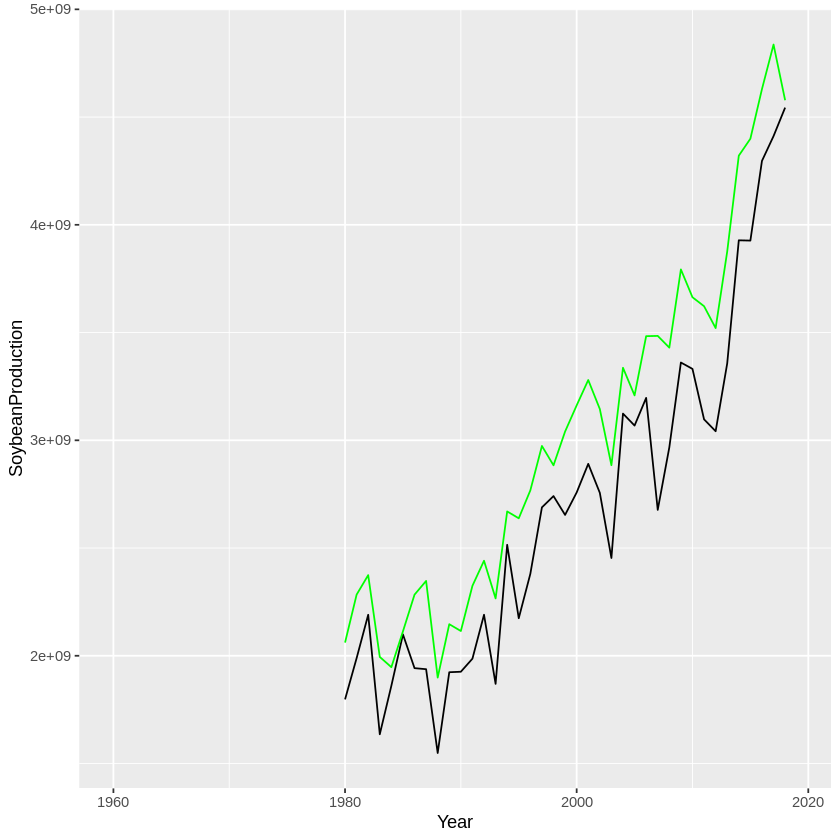

In [72]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanProduction)) +
    geom_line(aes(Year, SoybeanMealProduction*55 + SoybeanExports), color='green')

Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

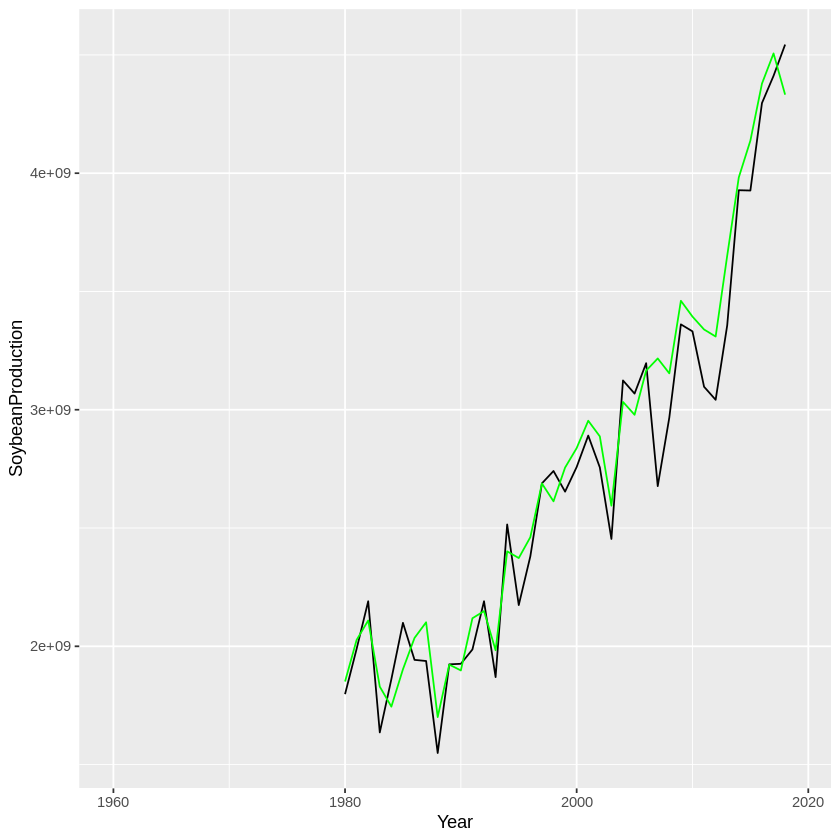

In [79]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanProduction)) +
    geom_line(aes(Year, SoybeanOilProduction/10 + SoybeanExports), color='green')